<a href="https://colab.research.google.com/github/AmitC04/ANN-IMPLEMENTATION-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print (tf.__version__)

2.17.1


In [ ]:
##import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
##Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)



In [ ]:
##Concatenate these variables with dataframes
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
##Splitting the dataset intol training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
##PART 2 NOW LETS CREATE THE ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
##Lets initialise the ANN
classifier=Sequential()

In [ ]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu',))

In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
##Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
##Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8017 - loss: 0.5315 - val_accuracy: 0.7955 - val_loss: 0.5063
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7856 - loss: 0.5232 - val_accuracy: 0.7955 - val_loss: 0.5036
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7907 - loss: 0.5128 - val_accuracy: 0.7955 - val_loss: 0.4866
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7891 - loss: 0.5001 - val_accuracy: 0.7955 - val_loss: 0.4667
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7959 - loss: 0.4800 - val_accuracy: 0.7955 - val_loss: 0.4582
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.4864 - val_accuracy: 0.7955 - val_loss: 0.4622
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4782 - val_accuracy: 0.7955 - val_loss: 0.4687
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7865 - loss: 0.4980 -

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

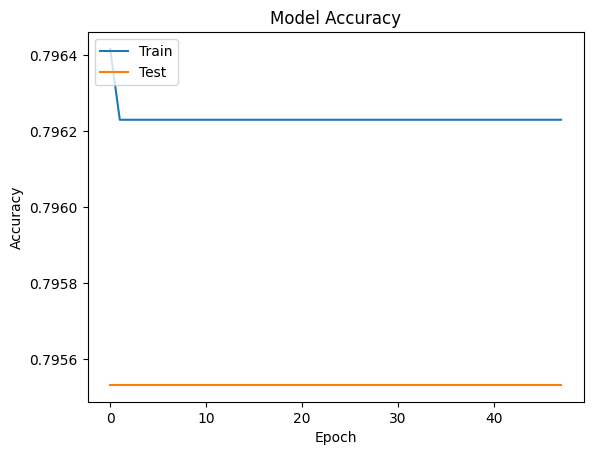

In [ ]:
##Summarise history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

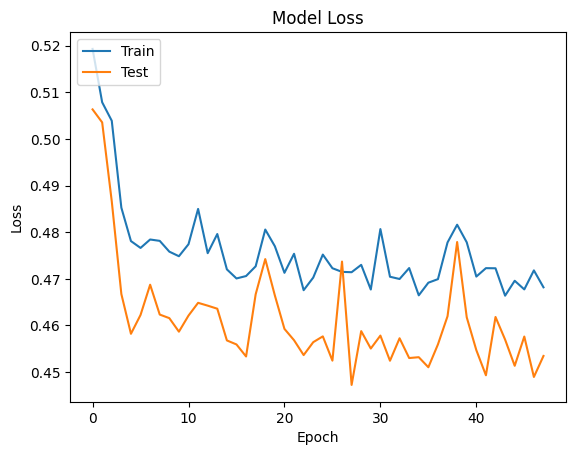

In [ ]:
##Summarise history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
## Making the predictions and evaluating the model


##Predicting the Test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [ ]:
##Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975

In [ ]:
## Get the weights
classifier.get_weights()

[array([[ 1.9505882e-01, -1.1208636e+00,  1.5507592e-01, -4.1393071e-02,
          9.2832756e-01,  8.3567578e-01,  1.1541913e+00,  3.1295407e-01,
         -4.9233669e-01, -6.3264632e-01,  2.6832876e-01],
        [-4.7398157e+00,  3.4446647e+00, -6.5280237e+00, -1.7260650e+00,
         -1.0994039e+00, -3.4787836e+00, -1.4300078e+00, -1.6124293e-01,
         -2.7237758e-01, -5.2272689e-01, -5.2565598e+00],
        [ 1.4693736e+00, -9.1581720e-01, -1.1476942e+00, -1.7283760e-01,
          2.0893015e-01,  2.8769913e-01,  1.0744910e+00, -7.6307821e-01,
         -1.9931993e-01, -8.2301062e-01, -1.3246223e+00],
        [ 1.1737770e+00,  4.1140667e-01, -7.9251163e-02,  7.8363431e-01,
          3.4459395e+00, -3.6096938e-02, -2.2690942e+00, -1.0728462e+00,
          4.5149398e-01, -1.1460729e+00, -8.2310989e-02],
        [-3.4079090e-01, -7.6451821e+00, -1.2986903e+00, -1.2915783e+00,
          6.0779152e+00, -5.7836187e-01, -5.2642971e-01, -1.0211573e-02,
         -4.4367542e-03,  2.1627544e-0